In [1]:
import csv, json 
import os.path
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import math
from scipy import signal

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
SAMPLING_RATE = 16000
SPLIT_FREQUENCY = 500

FRAME_SIZE = 480
HOP_LENGTH = 120

22050


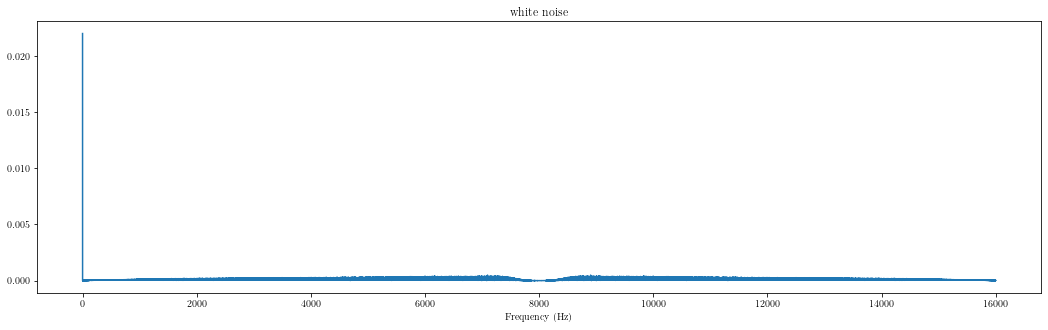

In [3]:
white, sr = librosa.load('audio_test_files/Blue_noise.ogg')
print(sr)
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1): #signal in time domain
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    rfft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(X_mag) for i in X_mag]
    plt.figure(figsize=(18, 5))
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    plt.plot(f[:f_bins], rfft_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)
   

plot_magnitude_spectrum(white, SAMPLING_RATE, 'white noise')

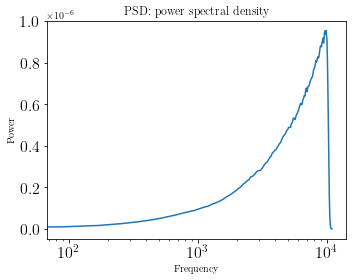

In [5]:
#freqs, times, spectrogram = signal.spectrogram(white)

freqs, psd = signal.welch(white, 22050)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

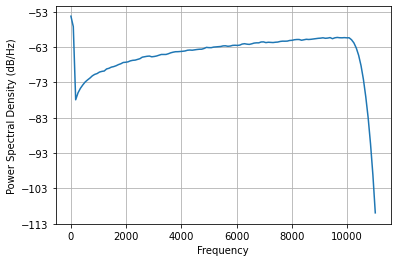

In [36]:
plt.psd(white, Fs=22050)

plt.show()